<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-the-Dataset" data-toc-modified-id="Load-the-Dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load the Dataset</a></span></li><li><span><a href="#Compare-by-Means" data-toc-modified-id="Compare-by-Means-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Compare by Means</a></span></li><li><span><a href="#Compare-by-Distplots" data-toc-modified-id="Compare-by-Distplots-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Compare by Distplots</a></span></li><li><span><a href="#Compare-by-Boxplots" data-toc-modified-id="Compare-by-Boxplots-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Compare by Boxplots</a></span></li><li><span><a href="#Compare-by-T-Tests" data-toc-modified-id="Compare-by-T-Tests-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Compare by T-Tests</a></span></li><li><span><a href="#Compare-by-Confidence-Intervals" data-toc-modified-id="Compare-by-Confidence-Intervals-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Compare by Confidence Intervals</a></span></li></ul></div>

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import IPython as ip
mpl.style.use('ggplot')
mpl.rc('font', family='Noto Sans CJK TC')
ip.display.set_matplotlib_formats('svg')

In [2]:
np.random.seed(20180701+3)

# Load the Dataset

In [3]:
df = pd.read_csv('dataset_howell1.csv', sep=';')
df.shape  # (rows, columns)

(544, 4)

In [4]:
group_male = df[df.male == 1].height
group_female = df[df.male == 0].height

In [5]:
group_male.head()

0    151.765
3    156.845
5    163.830
7    168.910
9    165.100
Name: height, dtype: float64

In [6]:
group_female.head()

1    139.700
2    136.525
4    145.415
6    149.225
8    147.955
Name: height, dtype: float64

In [7]:
group_ctl = df.sample(200).height
group_exp_1 = df.sample(200).height
group_exp_2 = group_male.sample(200)

In [8]:
group_ctl.head()

3      156.845
288    151.130
292    153.035
506    154.940
528    160.655
Name: height, dtype: float64

In [9]:
group_exp_1.head()

83     160.9598
476    153.6700
267    161.2900
404    146.0500
1      139.7000
Name: height, dtype: float64

In [10]:
group_exp_2.head()

233    165.735
72     153.670
105    167.005
360     71.120
139    170.815
Name: height, dtype: float64

# Compare by Means

In [11]:
group_male.describe()

count    257.000000
mean     142.321037
std       28.871320
min       60.452000
25%      124.993400
50%      157.480000
75%      161.925000
max      179.070000
Name: height, dtype: float64

In [12]:
group_female.describe()

count    287.000000
mean     134.630278
std       25.930233
min       53.975000
25%      125.247400
50%      146.050000
75%      151.130000
max      162.560000
Name: height, dtype: float64

In [13]:
group_male.mean() > group_female.mean()

True

In [14]:
group_ctl.describe()

count    200.000000
mean     139.508176
std       26.373245
min       59.613800
25%      129.540000
50%      149.225000
75%      156.845000
max      172.720000
Name: height, dtype: float64

In [15]:
group_exp_1.describe()

count    200.000000
mean     140.566952
std       26.332649
min       53.975000
25%      129.540000
50%      149.860000
75%      157.638750
max      172.720000
Name: height, dtype: float64

In [16]:
group_exp_2.describe()

count    200.000000
mean     142.323687
std       29.266201
min       60.452000
25%      127.476250
50%      157.480000
75%      161.290000
max      179.070000
Name: height, dtype: float64

In [17]:
group_exp_1.mean() > group_ctl.mean()

True

In [18]:
group_exp_2.mean() > group_ctl.mean()

True

# Compare by Distplots

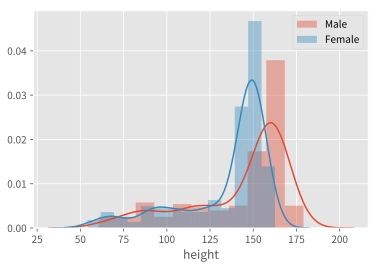

In [19]:
sns.distplot(group_male)
sns.distplot(group_female)
plt.legend(['Male', 'Female'])

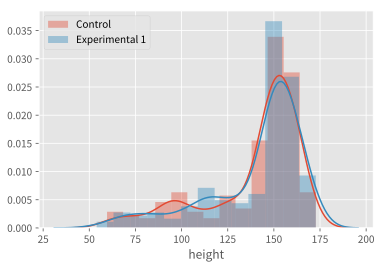

In [20]:
sns.distplot(group_ctl)
sns.distplot(group_exp_1)
plt.legend(['Control', 'Experimental 1'])

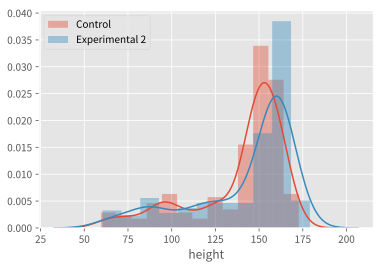

In [21]:
sns.distplot(group_ctl)
sns.distplot(group_exp_2)
plt.legend(['Control', 'Experimental 2'])

# Compare by Boxplots

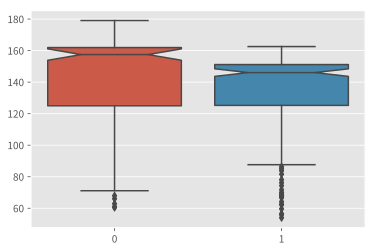

In [22]:
sns.boxplot(data=[group_male, group_female], notch=True)

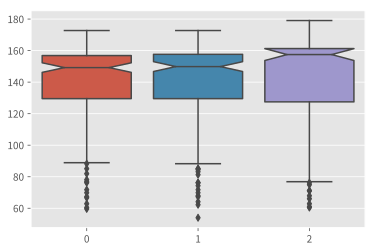

In [23]:
sns.boxplot(data=[group_ctl, group_exp_1, group_exp_2], notch=True)

# Compare by T-Tests

In [24]:
alpha = 0.05

In [25]:
r = sp.stats.ttest_ind(group_male, group_female)
print(r)
print(r.pvalue < alpha)

Ttest_indResult(statistic=3.273256851064318, pvalue=0.0011309256622558707)
True


In [26]:
r = sp.stats.ttest_ind(group_ctl, group_exp_1)
print(r)
print(r.pvalue < alpha)

Ttest_indResult(statistic=-0.4017674721157838, pvalue=0.6880708146934333)
False


In [27]:
r = sp.stats.ttest_ind(group_ctl, group_exp_2)
print(r)
print(r.pvalue < alpha)

Ttest_indResult(statistic=-1.0106904810611241, pvalue=0.31277863645650056)
False


# Compare by Confidence Intervals

In [28]:
for s in [group_male, group_female]:
    print(sp.stats.t.interval(loc=np.mean(s), scale=sp.stats.sem(s), df=len(s)-1, alpha=0.95))

(138.77448647827293, 145.86758822989827)
(131.61758225728605, 137.6429738402749)


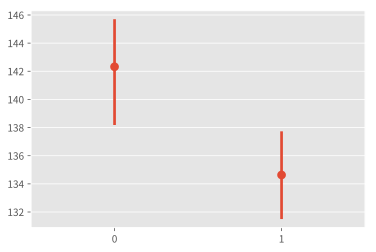

In [29]:
sns.pointplot(data=[group_male, group_female], join=False)

In [30]:
for s in [group_ctl, group_exp_1]:
    print(sp.stats.t.interval(loc=np.mean(s), scale=sp.stats.sem(s), df=len(s)-1, alpha=0.95))

(135.83073334375533, 143.18561865624466)
(136.89516997265247, 144.2387340273475)


In [31]:
for s in [group_ctl, group_exp_2]:
    print(sp.stats.t.interval(loc=np.mean(s), scale=sp.stats.sem(s), df=len(s)-1, alpha=0.95))

(135.83073334375533, 143.18561865624466)
(138.24285524045936, 146.4045187595406)


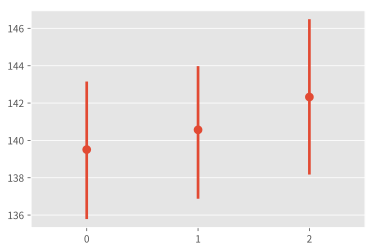

In [32]:
sns.pointplot(data=[group_ctl, group_exp_1, group_exp_2], join=False)

It's an interesting result, the male is higher than the female very significantly, but the all-from-male exp #2 isn't higher than the random ctl significantly. It shows sometimes even hypothesis tests still can't rule out the noise, and confidence intervals still play an important role.